In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.compat.v1 import InteractiveSession
from tensorflow.compat.v1 import ConfigProto
config = ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

E:\Anaconda5.2\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\Anaconda5.2\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\Anaconda5.2\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\Anaconda5.2\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
DATA_PATH = './Malaria-Classification-Using-CNN-master/malaria-dataset/'

In [4]:
img_width = 64
img_height = 64

In [5]:
datagen = ImageDataGenerator(rescale=1/255., validation_split=0.2)

In [6]:
train_data_generator = datagen.flow_from_directory(directory=DATA_PATH, target_size=(img_width, img_height),
                                                  class_mode='binary',
                                                  classes=['Parasitized', 'Uninfected'],
                                                  batch_size=16,
                                                  subset='training')

Found 22048 images belonging to 2 classes.


In [7]:
validation_data_generator = datagen.flow_from_directory(directory=DATA_PATH,
                                                   target_size = (img_width, img_height),
                                                   class_mode = 'binary',
                                                   classes=['Parasitized', 'Uninfected'],
                                                   batch_size = 16,
                                                   subset = 'validation'
                                                   )

Found 5510 images belonging to 2 classes.


In [8]:
train_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1])

## CNN Model Building

In [9]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [10]:
from tensorflow.keras.optimizers import Adam

In [12]:
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit_generator(generator=train_data_generator, steps_per_epoch=len(train_data_generator), 
                             epochs=5,
                             validation_data=validation_data_generator,
                             validation_steps=len(validation_data_generator))

Epoch 1/5
1378/1378 [==============================] - 34s 25ms/step - loss: 0.6368 - accuracy: 0.6298 - val_loss: 0.4609 - val_accuracy: 0.8639
Epoch 2/5
1378/1378 [==============================] - 22s 16ms/step - loss: 0.2677 - accuracy: 0.9071 - val_loss: 0.2151 - val_accuracy: 0.9309
Epoch 3/5
1378/1378 [==============================] - 21s 15ms/step - loss: 0.2052 - accuracy: 0.9310 - val_loss: 0.1827 - val_accuracy: 0.9299
Epoch 4/5
1378/1378 [==============================] - 21s 15ms/step - loss: 0.1969 - accuracy: 0.9316 - val_loss: 0.1773 - val_accuracy: 0.9348
Epoch 5/5
1378/1378 [==============================] - 21s 15ms/step - loss: 0.1819 - accuracy: 0.9351 - val_loss: 0.1709 - val_accuracy: 0.9330


In [14]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

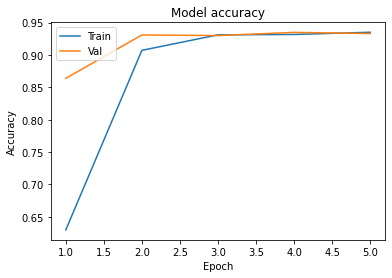

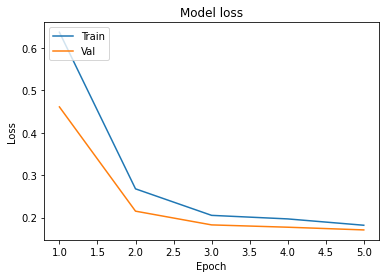

In [15]:
plot_learningCurve(history, 5)

In [16]:
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img, load_img

In [17]:
img_test_path = './Malaria-Classification-Using-CNN-master/malaria-dataset/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png'

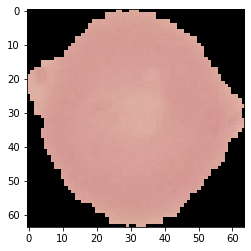

In [19]:
img_test = load_img(img_test_path, target_size=(img_width, img_height, 3))
plt.imshow(img_test)
img_test = img_to_array(img_test)
img_test = img_test / 255.
img_test = img_test.reshape(1, img_width, img_height, 3)
ypred = model.predict_classes(img_test)